In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # very important

In [5]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
import re
from IPython.display import Image, display

In [7]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Adaptive thresholding for better contrast
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                            cv2.THRESH_BINARY_INV, 35, 10)

    # Sharpen image
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(adaptive_thresh, -1, kernel)

    # Resize for better OCR clarity
    img_resized = cv2.resize(sharpened, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

    return img_resized


In [9]:
# Function to crop a specific region (for license plate) from the image
def crop_license_plate(image_path, x, y, w, h):
    # Read image
    img = cv2.imread(image_path)

    # Crop the image based on the provided bounding box (x, y, width, height)
    cropped_img = img[y:y+h, x:x+w]

    return cropped_img

In [11]:
def postprocess_text(text):
    return re.sub(r'[.\s]', '', text) 

In [13]:
import re

# List of possible formats (Customize as needed)
valid_plate_patterns = [
    r'^[A-Z]{2}\d{2}[A-Z]{2}\d{4}$',  # e.g., MH12AB1234
    r'^[A-Z]{2}\d{2}[A-Z]\d{4}$',     # e.g., KA03Z6789
    r'^[A-Z]{2}\d{1}[A-Z]{1,2}\d{4}$' # e.g., DL1CAA4567
]

def correct_using_dictionary(ocr_text):
    text_no_spaces = ocr_text.replace(" ", "").upper()

    # Match against known formats
    for pattern in valid_plate_patterns:
        if re.match(pattern, text_no_spaces):
            return text_no_spaces  # Return the valid format

    return text_no_spaces  # If no match, return as is

In [15]:
# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'], gpu=False)  # Set GPU to True if available for faster processing

Using CPU. Note: This module is much faster with a GPU.


In [41]:
image_path = "C:\\Users\\Nameet\\Number Plate Recognition\\demo.jpg"

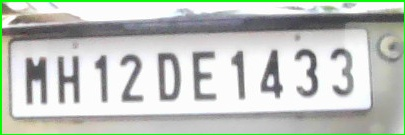

In [43]:
display(Image(image_path))

In [45]:
preprocessed_image = preprocess_image(image_path)

In [47]:
result = reader.readtext(preprocessed_image)

In [49]:
# Process & correct OCR output
print("Result for Image (Preprocessed):")
for detection in result:
    detected_text = detection[1]
    
    # Apply cleanup & character correction
    cleaned_text = postprocess_text(detected_text)
    corrected_text = correct_using_dictionary(cleaned_text)

    print(f"🔍 Raw OCR: {detected_text} | Cleaned: {cleaned_text} | ✅ Final: {corrected_text}")


Result for Image (Preprocessed):
🔍 Raw OCR: HH12DE1433 | Cleaned: HH12DE1433 | ✅ Final: HH12DE1433


In [27]:
import importlib
import connector
importlib.reload(connector)


<module 'connector' from 'C:\\Users\\Nameet\\Number Plate Recognition\\connector.py'>

In [148]:
owner_name = "Aniket"
connector.save_to_db(corrected_text , owner_name)

✅ Saved to DB: MH43AB6682 - Aniket
